<a href="https://colab.research.google.com/github/Brahmpreet07/YoungMoney/blob/main/sdc_hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1

##Importing and visualizing files
 We used pandas and matplot to import and visualize the data by sector and by year

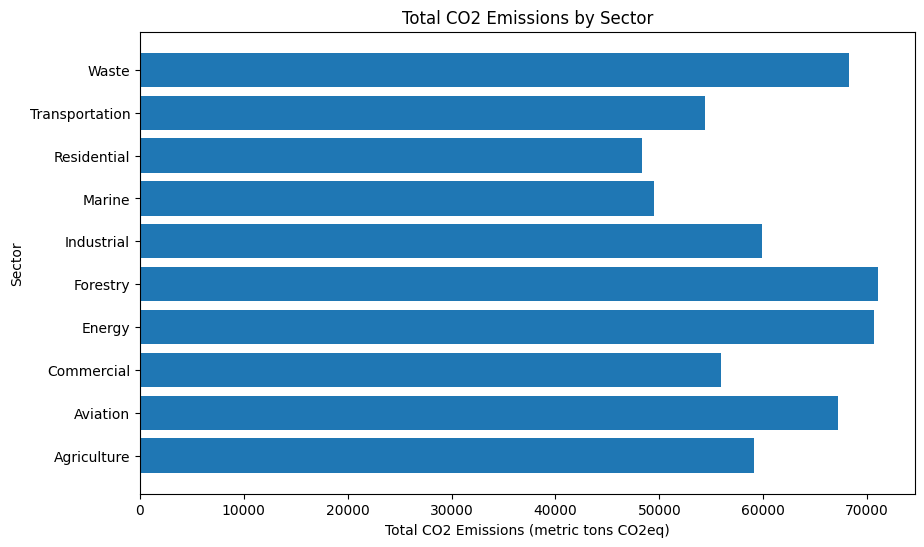

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file_path = '/content/sample_data/emissions.csv'  # Update this with the actual path to your CSV file

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

sectors = df['Sector']

# Calculate the total sum of emissions for each sector across all years
df['Total Emissions'] = df.drop('Sector', axis=1).sum(axis=1)

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.barh(df['Sector'], df['Total Emissions'])
plt.xlabel('Total CO2 Emissions (metric tons CO2eq)')
plt.ylabel('Sector')
plt.title('Total CO2 Emissions by Sector')
plt.show()


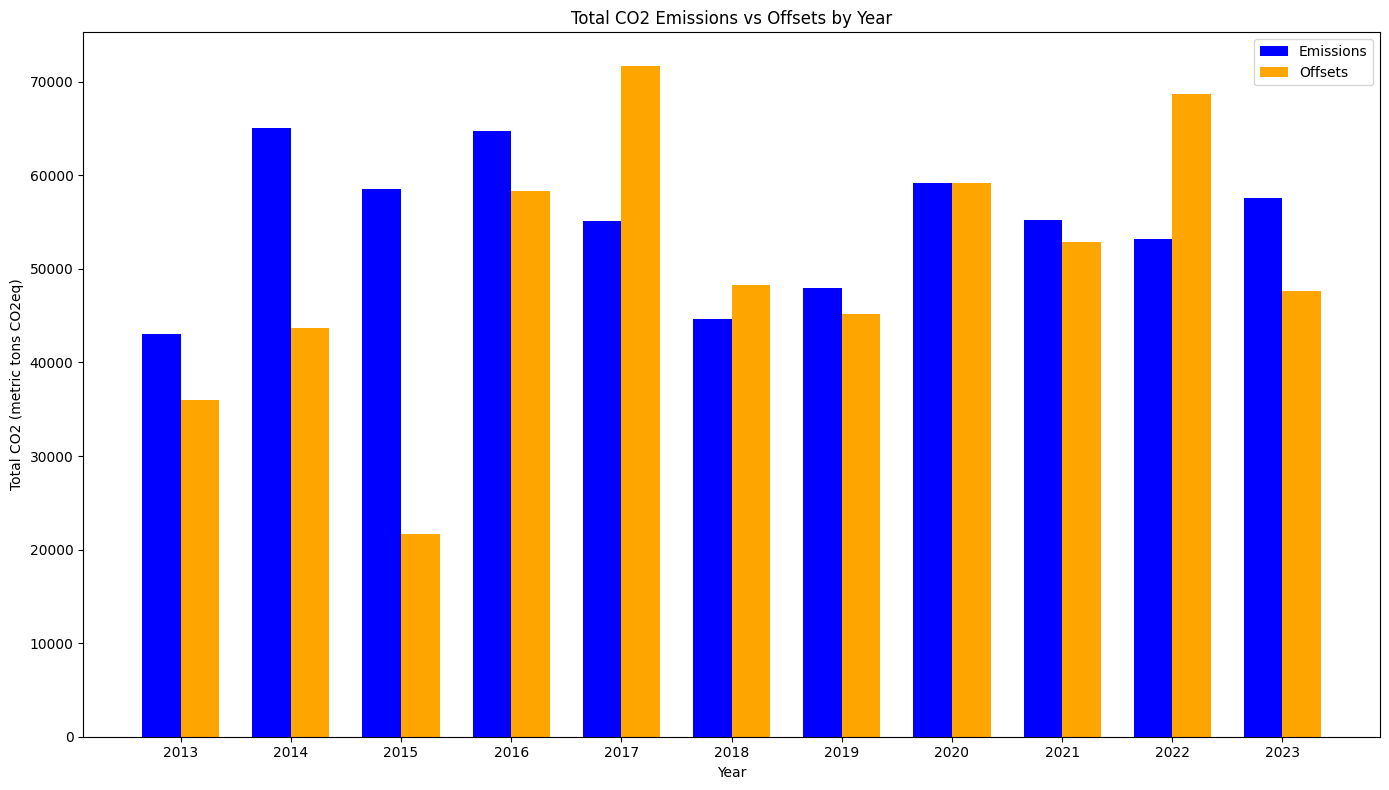

In [ ]:
emissions_file = 'emissions.csv'
offsets_file = 'offsets.csv'
companies_file = 'CarbonOffsetCompanies.csv'

# Reading the datasets into pandas DataFrames
df_emissions = pd.read_csv(emissions_file)
df_offsets = pd.read_csv(offsets_file)
#df_companies = pd.read_csv(companies_file)


year_columns = df_emissions.columns[1:]  # Adjust indices as needed if your DataFrame structure changes

# Transposing the selected year columns to have years as rows.
df_transposed = df_emissions.set_index('Sector')[year_columns].transpose()

# Calculating the total emissions for each year
df_transposed['Total Emissions'] = df_transposed.sum(axis=1)

# Resetting the index to turn the years into a regular column and get the Year and Total Emissions columns:
df_yearly_totals = df_transposed.reset_index().rename(columns={'index': 'Year'})
df_yearly_totals = df_yearly_totals[['Year', 'Total Emissions']]

df_yearly_totals['Year'] = df_yearly_totals['Year'].str[:4]

################## Plotting Offsets ########################
year_columns1 = df_offsets.columns[1:]  # Adjust indices as needed if your DataFrame structure changes
df_transposed1 = df_offsets.set_index('Sector')[year_columns1].transpose()
df_transposed1['Total Offsets'] = df_transposed1.sum(axis=1)
df_yearly_totals1 = df_transposed1.reset_index().rename(columns={'index': 'Year'})
df_yearly_totals1 = df_yearly_totals1[['Year', 'Total Offsets']]
df_yearly_totals1['Year'] = df_yearly_totals1['Year'].str[:4]

# print(df_yearly_totals1)
# Merging the emissions and offsets DataFrames on Year
df_combined_totals = pd.merge(df_yearly_totals, df_yearly_totals1, on='Year')

# Plotting
plt.figure(figsize=(14, 8))  # Adjust figure size as needed

# Width of the bars in the bar chart
bar_width = 0.35

# Setting the position of the bars on the x-axis
r1 = range(len(df_combined_totals['Year']))
r2 = [x + bar_width for x in r1]

# Creating the bars
plt.bar(r1, df_combined_totals['Total Emissions'], color='b', width=bar_width, label='Emissions')
plt.bar(r2, df_combined_totals['Total Offsets'], color='orange', width=bar_width, label='Offsets')

# Adding xticks, making sure to position them in the middle of the two bars
plt.xticks([r + bar_width/2 for r in range(len(df_combined_totals['Year']))], df_combined_totals['Year'])

plt.xlabel('Year')
plt.ylabel('Total CO2 (metric tons CO2eq)')
plt.title('Total CO2 Emissions vs Offsets by Year')


plt.legend()
plt.tight_layout()
plt.show()

#Part 2

##Calculated net emissions

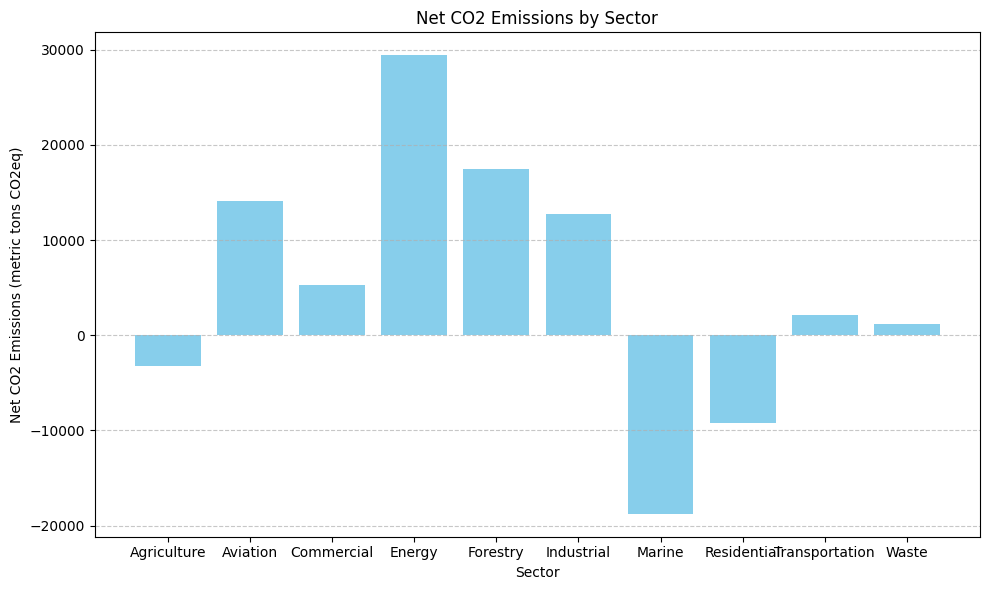

In [ ]:
# Sample DataFrames
data1 = {
    'Sector': ['A', 'B', 'C'],
    '2013 (metric tons CO2eq)': [100, 200, 150],
    '2014 (metric tons CO2eq)': [120, 180, 170],
    '2015 (metric tons CO2eq)': [90, 220, 160],
    '2016 (metric tons CO2eq)': [110, 240, 140]
}

data2 = {
    'Sector': ['A', 'B', 'C'],
    '2013 (metric tons CO2eq)': [80, 210, 140],
    '2014 (metric tons CO2eq)': [110, 170, 160],
    '2015 (metric tons CO2eq)': [100, 190, 180],
    '2016 (metric tons CO2eq)': [120, 230, 150]
}

emissions = '/content/sample_data/emissions.csv'  # Update this with the actual path to your CSV file
offsets = '/content/sample_data/offsets.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(emissions)
df2 = pd.read_csv(offsets)
#df1 = pd.DataFrame(data1)
#df2 = pd.DataFrame(data2)

# Calculate the total sum of emissions for each sector across all years for both DataFrames
df1['Total Emissions'] = df1.drop('Sector', axis=1).sum(axis=1)
df2['Total Emissions'] = df2.drop('Sector', axis=1).sum(axis=1)

# Calculate the difference in emissions between df1 and df2 for each sector
df_difference = df1[['Sector', 'Total Emissions']].copy()
df_difference['Difference'] = df1['Total Emissions'] - df2['Total Emissions']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_difference['Sector'], df_difference['Difference'], color='skyblue')

plt.xlabel('Sector')
plt.ylabel('Net CO2 Emissions (metric tons CO2eq)')
plt.title('Net CO2 Emissions by Sector')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Sector  Year  Total Emissions  Total Offsets  Difference
0       2013            43087          36013        7074
1       2014            65111          43705       21406
2       2015            58529          21671       36858
3       2016            64729          58282        6447
4       2017            55091          71698      -16607
5       2018            44605          48304       -3699
6       2019            47949          45207        2742
7       2020            59149          59149           0
8       2021            55257          52890        2367
9       2022            53177          68641      -15464
10      2023            57530          47639        9891


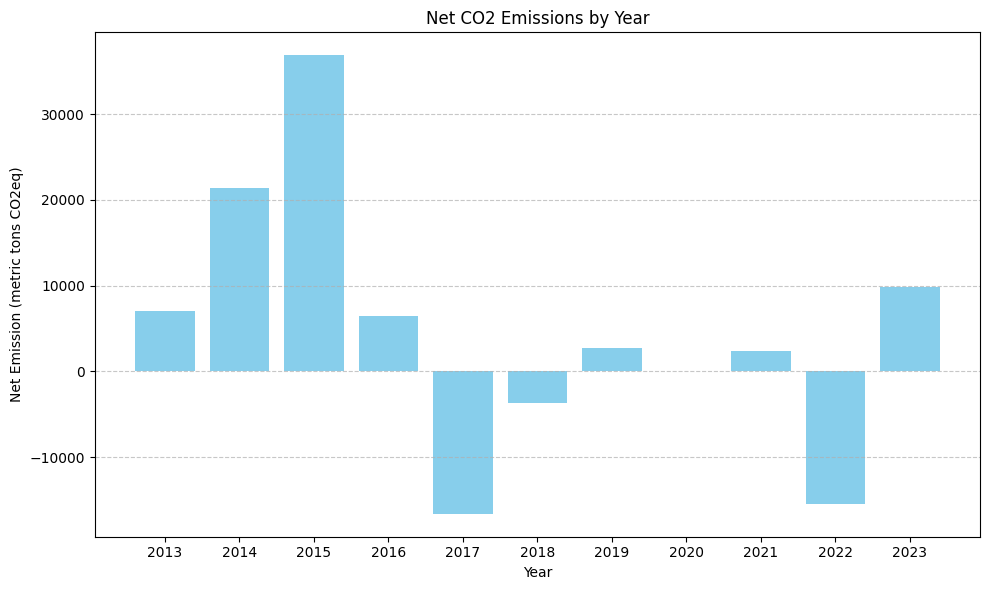

In [ ]:
df_combined_totals['Difference'] = df_combined_totals['Total Emissions'] - df_combined_totals['Total Offsets']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df_combined_totals['Year'], df_combined_totals['Difference'], color='skyblue')

plt.xlabel('Year')
plt.ylabel('Net Emission (metric tons CO2eq)')
plt.title('Net CO2 Emissions by Year')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Part 3
## Linear Regression Analysis

Performed a Linear Regression prediction using a scikit-learn library to estimate the predicted emissions and offsets for 2023 across all sectors.

Using these values, we can determine the net carbon emissions for the next year and calculate a predicted amount for the tax paid or credits received (assuming a 65% per metric ton of CO2)

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

df_combined_totals['Carbon Tax Paid'] = df_combined_totals['Difference'] * 0.65
print(df_combined_totals)

mean_tax = df_combined_totals['Carbon Tax Paid'].mean()
std_dev_tax = df_combined_totals['Carbon Tax Paid'].std()

# Assuming df_combined is your DataFrame with 'Year', 'Total Emissions', and 'Total Offsets'
# Convert 'Year' to numerical for modeling
df_combined_totals['Year'] = df_combined_totals['Year'].astype(int)

# Prepare X (year) and y (values) for emissions and offsets
X = df_combined_totals[['Year']]
y_emissions = df_combined_totals['Total Emissions']
y_offsets = df_combined_totals['Total Offsets']

# Initialize and train the models
model_emissions = LinearRegression().fit(X, y_emissions)
model_offsets = LinearRegression().fit(X, y_offsets)

# Predict for the next year
next_year = np.array([[X['Year'].max() + 1]])
predicted_emissions = model_emissions.predict(next_year)[0]
predicted_offsets = model_offsets.predict(next_year)[0]

# Calculate net emissions and carbon tax
predicted_net_emissions = predicted_emissions - predicted_offsets
carbon_tax_rate = 0.65  # 65%
predicted_tax = predicted_net_emissions * carbon_tax_rate

print(f"Predicted Emissions: {predicted_emissions:.2f}")
print(f"Predicted Offsets: {predicted_offsets:.2f}")
print(f"Predicted Net Emissions: {predicted_net_emissions:.2f}")
print(f"Estimated Carbon Tax: ${predicted_tax:.2f}")
print(f"Mean Carbon Tax for 10 Years: ${mean_tax:.2f}")

Sector  Year  Total Emissions  Total Offsets  Difference  Carbon Tax Paid
0       2013            43087          36013        7074          4598.10
1       2014            65111          43705       21406         13913.90
2       2015            58529          21671       36858         23957.70
3       2016            64729          58282        6447          4190.55
4       2017            55091          71698      -16607        -10794.55
5       2018            44605          48304       -3699         -2404.35
6       2019            47949          45207        2742          1782.30
7       2020            59149          59149           0             0.00
8       2021            55257          52890        2367          1538.55
9       2022            53177          68641      -15464        -10051.60
10      2023            57530          47639        9891          6429.15
Predicted Emissions: 54730.05
Predicted Offsets: 62660.31
Predicted Net Emissions: -7930.25
Estimated Carbon Tax

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Assessing how ideal are the predicted values

Create a normal distrubution for the carbon taxes paid over the last 10 years and compare the predicted values against the previous year's.

*NOTE:* Graph is flipped to reflect how lower tax paid is more ideal (shown as a higher percentile)

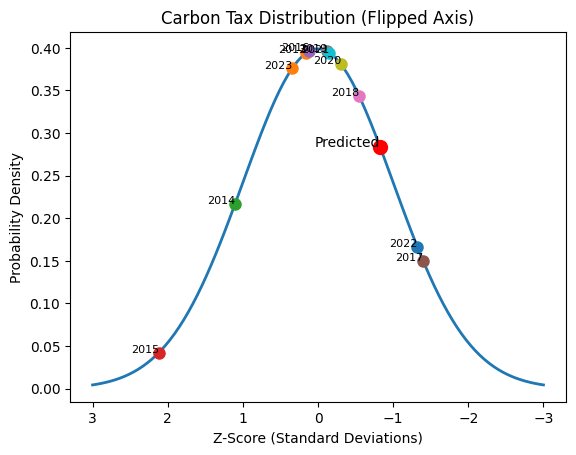


Considering lower taxes as better, the predicted Carbon Tax's Percentile is: 79.58%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

df_combined_totals['Z'] = (df_combined_totals['Carbon Tax Paid'] - mean_tax) / std_dev_tax

# Generate the points for the standard normal distribution
x = np.linspace(-3, 3, 100)
y = norm.pdf(x, 0, 1)

# Begin plotting
fig, ax = plt.subplots()

# Plot the standard normal distribution curve
ax.plot(x, y, label='Standard Normal Distribution', lw=2)

# Invert the x-axis to show more favorable (lower) taxes on the right
ax.invert_xaxis()

# Plot each year's carbon tax as a point on the distribution, using larger markers
for index, row in df_combined_totals.iterrows():
    ax.plot(row['Z'], norm.pdf(row['Z']), 'o', markersize=8)  # Removed label for decluttering

# Label the years next to the points as integers
for index, row in df_combined_totals.iterrows():
    plt.text(row['Z'], norm.pdf(row['Z']), f"{int(row['Year'])}", fontsize=8, ha='right')

# Plot and label the predicted tax point, making sure the label is an integer if needed
predicted_z = (predicted_tax - mean_tax) / std_dev_tax
ax.plot(predicted_z, norm.pdf(predicted_z), 'o', markersize=10, color='red')
plt.text(predicted_z, norm.pdf(predicted_z), 'Predicted', fontsize=10, ha='right')

# Add labels and title
ax.set_xlabel('Z-Score (Standard Deviations)')
ax.set_ylabel('Probability Density')
ax.set_title('Carbon Tax Distribution (Flipped Axis)')

# Display the graph
plt.show()

# Calculate and print the percentile of the predicted tax
percentile = (1 - norm.cdf(predicted_z)) * 100
print(f"\nConsidering lower taxes as better, the predicted Carbon Tax's Percentile is: {percentile:.2f}%")

# Part 4

##Optimal Method for picking companies

Index(['Year', 'Total Emissions', 'Total Offsets'], dtype='object', name='Sector')


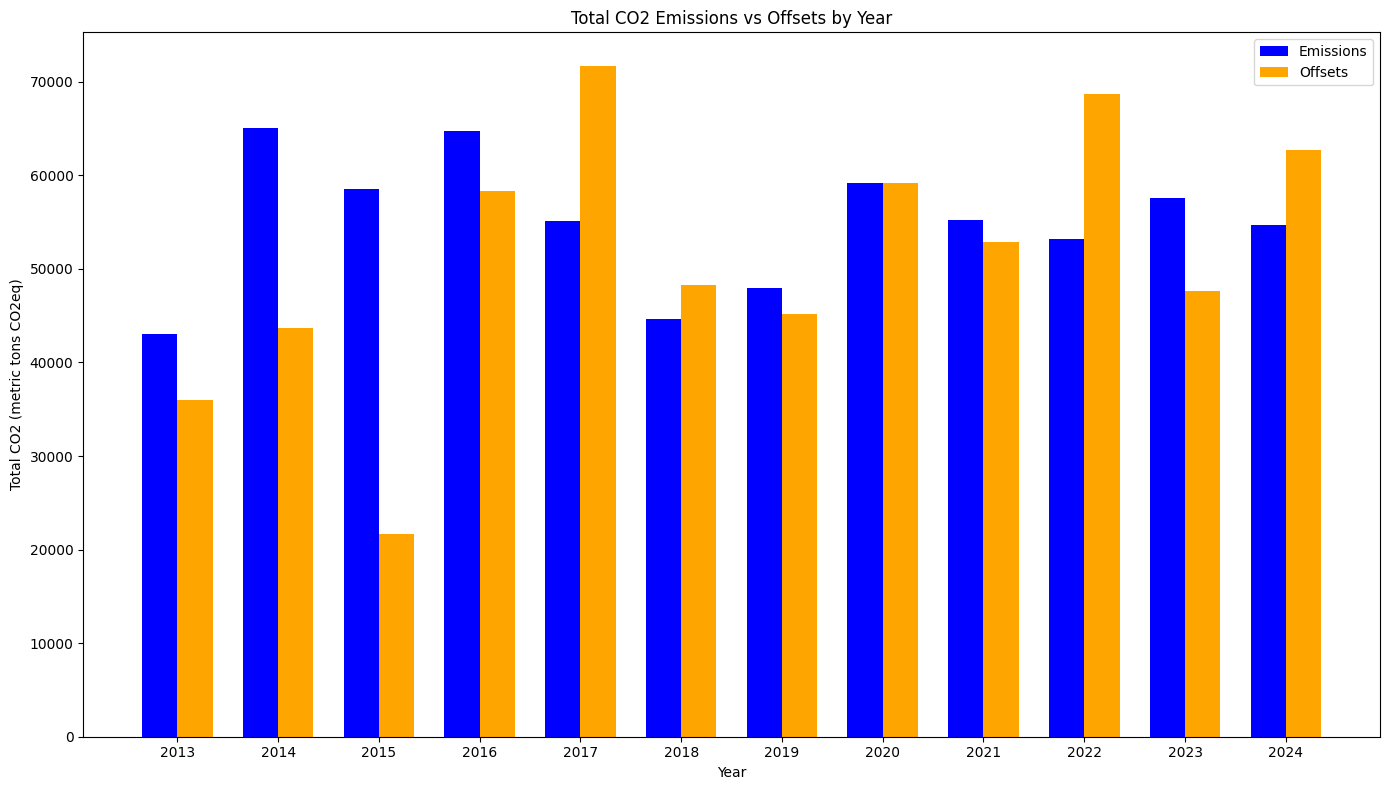

Sector  Year  Total Emissions  Total Offsets
0       2013     43087.000000   36013.000000
1       2014     65111.000000   43705.000000
2       2015     58529.000000   21671.000000
3       2016     64729.000000   58282.000000
4       2017     55091.000000   71698.000000
5       2018     44605.000000   48304.000000
6       2019     47949.000000   45207.000000
7       2020     59149.000000   59149.000000
8       2021     55257.000000   52890.000000
9       2022     53177.000000   68641.000000
10      2023     57530.000000   47639.000000
11      2024     54730.054545   62660.309091


In [ ]:
from sklearn.linear_model import LinearRegression

year_columns = df_emissions.columns[1:]  # Adjust indices as needed if your DataFrame structure changes

# Transposing the selected year columns to have years as rows.
df_transposed = df_emissions.set_index('Sector')[year_columns].transpose()

# Calculating the total emissions for each year
df_transposed['Total Emissions'] = df_transposed.sum(axis=1)

# Resetting the index to turn the years into a regular column and get the Year and Total Emissions columns:
df_yearly_totals = df_transposed.reset_index().rename(columns={'index': 'Year'})
df_yearly_totals = df_yearly_totals[['Year', 'Total Emissions']]

df_yearly_totals['Year'] = df_yearly_totals['Year'].str[:4]

################## Plotting Offsets ########################
year_columns1 = df_offsets.columns[1:]  # Adjust indices as needed if your DataFrame structure changes
df_transposed1 = df_offsets.set_index('Sector')[year_columns1].transpose()
df_transposed1['Total Offsets'] = df_transposed1.sum(axis=1)
df_yearly_totals1 = df_transposed1.reset_index().rename(columns={'index': 'Year'})
df_yearly_totals1 = df_yearly_totals1[['Year', 'Total Offsets']]
df_yearly_totals1['Year'] = df_yearly_totals1['Year'].str[:4]

# print(df_yearly_totals1)
# Merging the emissions and offsets DataFrames on Year
df_combined_totals = pd.merge(df_yearly_totals, df_yearly_totals1, on='Year')

########

temp = df_combined_totals
temp.set_index('Year', inplace=True)

# Fit a linear regression model to predict Total Emissions and Total Offsets based on Year
X = temp.index.values.reshape(-1, 1)
y_emissions = temp['Total Emissions']
y_offsets = temp['Total Offsets']

model_emissions = LinearRegression()
model_offsets = LinearRegression()

model_emissions.fit(X, y_emissions)
model_offsets.fit(X, y_offsets)

# Predict Total Emissions and Total Offsets for the year 2024
year_2024 = 2024
predicted_emissions_2024 = model_emissions.predict([[year_2024]])[0]
predicted_offsets_2024 = model_offsets.predict([[year_2024]])[0]

# Add the prediction to the DataFrame
temp.loc[year_2024] = [predicted_emissions_2024, predicted_offsets_2024]

df_combined_totals = temp
df_combined_totals.reset_index(inplace=True)
df_combined_totals.rename(columns={'Year': 'Year', 'Total Emissions': 'Total Emissions', 'Total Offsets': 'Total Offsets'}, inplace=True)


######

shape = df_combined_totals.columns
print(shape)

# Plotting
plt.figure(figsize=(14, 8))  # Adjust figure size as needed

# Width of the bars in the bar chart
bar_width = 0.35

# Setting the position of the bars on the x-axis
r1 = range(len(df_combined_totals['Year']))
r2 = [x + bar_width for x in r1]

# Creating the bars
plt.bar(r1, df_combined_totals['Total Emissions'], color='b', width=bar_width, label='Emissions')
plt.bar(r2, df_combined_totals['Total Offsets'], color='orange', width=bar_width, label='Offsets')

# Adding xticks, making sure to position them in the middle of the two bars
plt.xticks([r + bar_width/2 for r in range(len(df_combined_totals['Year']))], df_combined_totals['Year'])

plt.xlabel('Year')
plt.ylabel('Total CO2 (metric tons CO2eq)')
plt.title('Total CO2 Emissions vs Offsets by Year')


plt.legend()
plt.tight_layout()
plt.show()
print(df_combined_totals)

Difference DataFrame:
           Sector  DataFrame 1 Prediction  DataFrame 2 Prediction   Difference
0     Agriculture             4463.727273             8117.672727 -3653.945455
1        Aviation             7694.381818             5458.472727  2235.909091
2      Commercial             6790.309091             5925.872727   864.436364
3          Energy             5823.436364             8079.381818 -2255.945455
4        Forestry             7998.527273             5584.490909  2414.036364
5      Industrial             4737.454545             5357.545455  -620.090909
6          Marine             4564.054545             6587.363636 -2023.309091
7     Residential              754.400000             7084.163636 -6329.763636
8  Transportation             6580.654545             4353.690909  2226.963636
9           Waste             5323.109091             6111.654545  -788.545455
Difference DataFrame without prediction fields:
           Sector   Difference
0     Agriculture -3653.945455

<ipython-input-46-07850da303a0>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_companies['Cost per CO2OffsetTonnes'] = filtered_companies['Cost'] / filtered_companies['CO2OffsetTonnes']


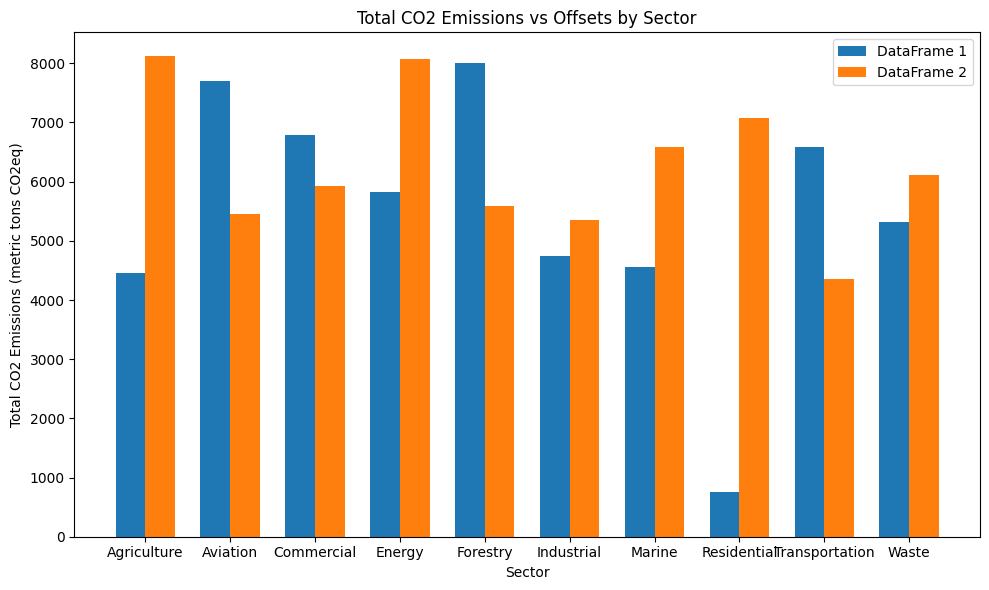

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Sample DataFrames
data1 = {
    'Sector': ['A', 'B', 'C'],
    '2019 (metric tons CO2eq)': [160, 280, 110],
    '2020 (metric tons CO2eq)': [170, 290, 100],
    '2021 (metric tons CO2eq)': [180, 300, 90],
    '2022 (metric tons CO2eq)': [190, 310, 80],
    '2023 (metric tons CO2eq)': [200, 320, 70],
}
data2 = {
    'Sector': ['A', 'B', 'C'],
    '2019 (metric tons CO2eq)': [170, 270, 120],
    '2020 (metric tons CO2eq)': [180, 280, 110],
    '2021 (metric tons CO2eq)': [190, 290, 100],
    '2022 (metric tons CO2eq)': [200, 300, 90],
    '2023 (metric tons CO2eq)': [210, 310, 80],
}
#df1 = pd.DataFrame(data1)
#df2 = pd.DataFrame(data2)

emissions = '/content/sample_data/emissions.csv'  # Update this with the actual path to your CSV file
offsets = '/content/sample_data/offsets.csv'
companies = '/content/sample_data/CarbonOffsetCompanies.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(emissions)
df2 = pd.read_csv(offsets)
df3 = pd.read_csv(companies)

# Function to predict emissions for the next year
def predict_emissions(df):
    predictions = {}
    years = [int(col.split()[0]) for col in df.columns[1:]]
    emissions = df.iloc[:, 1:].values

    for i, sector in enumerate(df['Sector']):
        X = np.array(years).reshape(-1, 1)
        y = emissions[i]

        model = LinearRegression()
        model.fit(X, y)

        next_year = np.array([2024]).reshape(-1, 1)
        next_year_emission = model.predict(next_year)[0]

        predictions[sector] = next_year_emission

    return predictions

# Predict emissions for each DataFrame separately
predictions_df1 = predict_emissions(df1)
predictions_df2 = predict_emissions(df2)

# Calculate the total sum of emissions for each sector across all years for both DataFrames
df1['Total Emissions'] = df1.drop('Sector', axis=1).sum(axis=1)
df2['Total Emissions'] = df2.drop('Sector', axis=1).sum(axis=1)

# Combine the predictions into a new DataFrame
combined_df = pd.DataFrame({
    'Sector': df1['Sector'],
    'DataFrame 1 Prediction': [predictions_df1[sector] for sector in df1['Sector']],
    'DataFrame 2 Prediction': [predictions_df2[sector] for sector in df2['Sector']],
})

# Make a copy of the combined DataFrame to preserve its structure
diff_df = combined_df.copy()

# Calculate the difference between the values in 'DataFrame 1 Prediction' and 'DataFrame 2 Prediction' columns
diff_df['Difference'] = combined_df['DataFrame 1 Prediction'] - combined_df['DataFrame 2 Prediction']

# Display the resulting difference DataFrame
print("Difference DataFrame:")
print(diff_df)

# Drop the prediction fields from the difference DataFrame
diff_df = diff_df.drop(['DataFrame 1 Prediction', 'DataFrame 2 Prediction'], axis=1)

# Display the resulting difference DataFrame
print("Difference DataFrame without prediction fields:")
print(diff_df)

# Filter the DataFrame to drop rows with negative values in the 'Difference' column
diff_df_filtered = diff_df[diff_df['Difference'] >= 0]

# Display the resulting DataFrame
print("Filtered Difference DataFrame:")
print(diff_df_filtered)
df3 = df3.drop(['ProjectID'], axis=1)
print(df3)
company_df = df3
difference_df = diff_df_filtered
#######
# Get unique sectors from the difference DataFrame
unique_sectors = difference_df['Sector'].unique()

# Filter the company_df DataFrame based on matching sectors
filtered_companies = company_df[company_df['Sector'].isin(unique_sectors)]

# Calculate the cost per CO2 offset tonne
filtered_companies['Cost per CO2OffsetTonnes'] = filtered_companies['Cost'] / filtered_companies['CO2OffsetTonnes']

# Filter the DataFrame based on the condition
selected_companies = filtered_companies[filtered_companies['Cost per CO2OffsetTonnes'] <= 0.65]

# Display the selected companies
print("Selected Companies:")
print(selected_companies)



"""
# Sort the companies within each sector by their cost-effectiveness
company_df['Cost per CO2OffsetTonnes'] = company_df['Cost'] / company_df['CO2OffsetTonnes']
company_df_sorted = company_df.sort_values(by=['Sector', 'Cost per CO2OffsetTonnes'])

# Initialize a dictionary to store the selected companies for each sector
selected_companies = {}

# Iterate through each sector
for sector in filtered_difference['Sector']:
    # Initialize total offset and selected companies list for the current sector
    total_offset = filtered_difference.loc[filtered_difference['Sector'] == sector, 'Difference'].iloc[0] * 0.65  # Consider 65% saving
    selected_companies[sector] = []

    # Iterate through companies sorted by cost-effectiveness
    for _, company in company_df_sorted.iterrows():
        # Check if the company is in the current sector
        if company['Sector'] == sector:
            # Check if there is enough offset to cover the difference
            if total_offset >= company['CO2OffsetTonnes']:
                # Add the company to the selected list and update total offset
                selected_companies[sector].append((company['Company Name'], company['CO2OffsetTonnes'], company['Cost']))
                total_offset -= company['CO2OffsetTonnes']
            else:
                # Calculate taxes saved only on the amount that covers the difference
                taxes_saved = total_offset * (company['Cost'] / company['CO2OffsetTonnes']) * 0.65
                selected_companies[sector].append((company['Company Name'], total_offset, taxes_saved))
                break

# Display the selected companies for each sector
for sector, companies in selected_companies.items():
    print(f"Sector: {sector}")
    print("Selected Companies:")
    for company in companies:
        print(f"Company: {company[0]}, CO2 Offset Tonnes: {company[1]}, Taxes Saved: {company[2]}")
    print()

"""
#######

# Plot the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(combined_df))

plt.bar(index, combined_df['DataFrame 1 Prediction'], bar_width, label='DataFrame 1')
plt.bar([i + bar_width for i in index], combined_df['DataFrame 2 Prediction'], bar_width, label='DataFrame 2')

plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions (metric tons CO2eq)')
plt.title('Total CO2 Emissions vs Offsets by Sector')
plt.xticks([i + bar_width / 2 for i in index], combined_df['Sector'])
plt.legend()
plt.tight_layout()
plt.show()





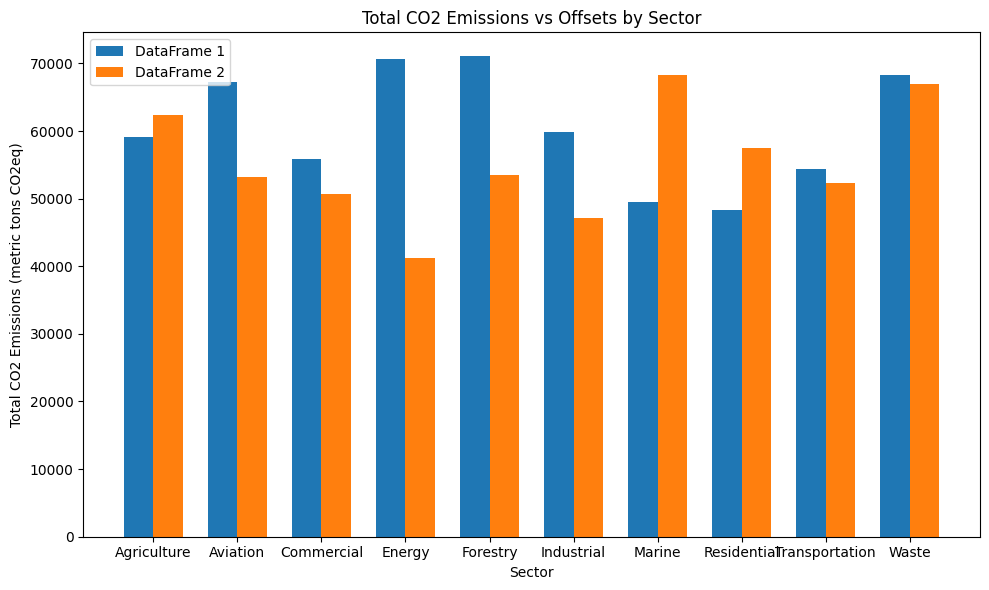

In [ ]:
# Sample DataFrames
data1 = {
    'Sector': ['A', 'B', 'C'],
    '2013 (metric tons CO2eq)': [100, 200, 150],
    '2014 (metric tons CO2eq)': [120, 180, 170],
    '2015 (metric tons CO2eq)': [90, 220, 160],
    '2016 (metric tons CO2eq)': [110, 240, 140]
}

data2 = {
    'Sector': ['A', 'B', 'C'],
    '2013 (metric tons CO2eq)': [80, 210, 140],
    '2014 (metric tons CO2eq)': [110, 170, 160],
    '2015 (metric tons CO2eq)': [100, 190, 180],
    '2016 (metric tons CO2eq)': [120, 230, 150]
}

emissions = '/content/sample_data/emissions.csv'  # Update this with the actual path to your CSV file
offsets = '/content/sample_data/offsets.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(emissions)
df2 = pd.read_csv(offsets)
#df1 = pd.DataFrame(data1)
#df2 = pd.DataFrame(data2)

# Calculate the total sum of emissions for each sector across all years for both DataFrames
df1['Total Emissions'] = df1.drop('Sector', axis=1).sum(axis=1)
df2['Total Emissions'] = df2.drop('Sector', axis=1).sum(axis=1)

# Plot the bar graph
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df1))

plt.bar(index, df1['Total Emissions'], bar_width, label='DataFrame 1')
plt.bar([i + bar_width for i in index], df2['Total Emissions'], bar_width, label='DataFrame 2')

plt.xlabel('Sector')
plt.ylabel('Total CO2 Emissions (metric tons CO2eq)')
plt.title('Total CO2 Emissions vs Offsets by Sector')
plt.xticks([i + bar_width / 2 for i in index], df1['Sector'])
plt.legend()
plt.tight_layout()
plt.show()
